# Import Packages

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import matplotlib.pyplot as plt
from IPython.display import Image
import os

# Introduction

### Overview

Given that investors are becoming more concerned with how a company impacts the world and its local communities, our goal is to analyze whether the sustainable and ethnical nature of company drives positive financial performance.  Specifically, we will look at how a company scores as it relates to environment, social, and governance (ESG) factors. With said variables, our analysis will test whether there any statistically significant relationships with financial metrics pertaining to profitability, asset efficiency, liquidity, cash flow generation, and stock price performance. Ultimately, the strength of the relationships will be determined via calculating correlations and regression analysis.

Please see below for more specific examples about what is considered when generating the ESG scores. 

### Factors which are considered in ESG scores

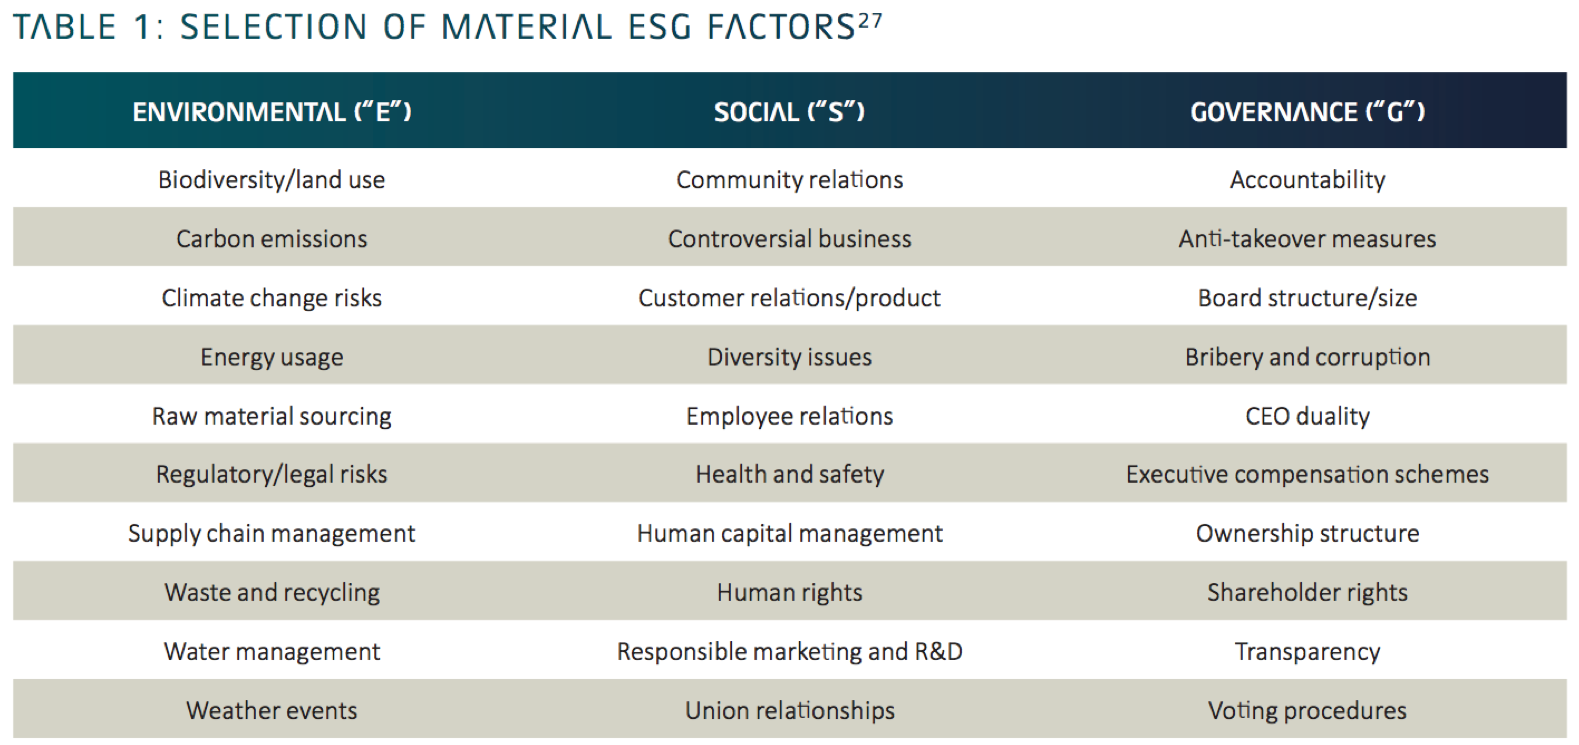

In [2]:
# Get file path and picture
file_path = os.getcwd()
picture_path = file_path + '/ESG_Factors.png'
Image(filename = picture_path)

# Main Data Frame

In [3]:
# Import and display master_df
master_df = pd.read_pickle('master_df.pkl')
pd.set_option('display.float_format', '{:.2f}'.format)
master_df.head()

,name,sector,industry,address,lat,lng,totalESG,totalPercentile,environmentScore,peerEnvironment,socialScore,peerSocial,governanceScore,peerGovernance,profit_margin,asset_turnover,quick_ratio,cash_flow_margin,avg_annual_return
Ticker,,,,,,,,,,,,,,,,,,,
AAP,"Advance Auto Parts, Inc.",Consumer Cyclical,Specialty Retail,"2635 East Millbrook Road, Raleigh, NC, 27604",35.85,-78.59,46.42,20.93,40.93,53.01,41.49,53.33,62.00,62.25,0.04,1.06,0.44,0.08,0.37
AAPL,Apple Inc.,Technology,Consumer Electronics,"One Apple Park Way, Cupertino, CA, 95014",37.33,-122.01,70.34,77.78,88.71,67.24,56.80,63.60,59.88,63.28,0.23,0.72,1.25,0.29,0.97
ABC,AmerisourceBergen Corporation,Healthcare,Medical Distribution,"1300 Morris Drive, Chesterbrook, PA, 19087",40.07,-75.47,52.11,40.46,62.50,65.66,43.54,53.43,56.30,60.45,0.01,4.59,0.53,0.01,0.23
ACM,AECOM,Industrials,Engineering & Construction,"1999 Avenue of the Stars, Los Angeles, CA, 90067",34.06,-118.42,70.52,90.77,67.22,62.08,67.42,55.30,77.96,62.01,0.00,1.38,1.20,0.03,0.02
ACN,Accenture plc,Technology,Information Technology Services,"1 Grand Canal Square, Dublin, Ireland",53.34,-6.29,73.76,93.93,82.67,58.25,68.72,52.57,72.15,61.27,0.11,1.67,1.35,0.16,0.46


The main data frame was constructed as the primary source for all the analysis conducted.  Specifically, it is indexed by ticker and contains the relevant company information, ESG scores, and financial performance for each respective firm. Furthermore, there are a total of 310 companies which had data for all the desired information. Ultimately, please note that while this is the main data frame, there are other data frames, which draw from master_df, that were constructed for purposes of making each analysis technique more efficient. Please see below for a description of each of the 19 columns:

**name**: name of the company

**sector**: sector designated by Yahoo Finance

**industry**: sub-sector/industry designated by Yahoo Finance

**address**: where the company is headquartered

**lat**: latitude coordinate of company headquarter

**lng**: longitude coordinate of company headquarter

**totalESG**: the total score given to the company by Yahoo Finance based on environmental, social, and governance factors

**totalPercentile**: what percentile the company ranks in for totalESG compared to all other companies

**environmentScore**: score given to the company based on the their commitment to environmental factors

**peerEnvironment**: average environment score of comparable companies

**socialScore**: score given to the company based on the their commitment to social factors

**peerSocial**: average social score of comparable companies

**goverannceScore**: score given to the company based on the their commitment to governance factors

**peerGovernance**: average governance score of comparable companies

**profit_margin**: profitability metric calculated as net income / total revenue

**asset_turnover**: asset efficiency metric calculated as total revenue / average total assets

**quick_ratio**: liquidity metric calculated as (Cash equivalents + marketable securities + accounts receivables) / current liabilities

**cash_flow_margin**: sales to cash conversion efficiency metric calculated as operating cash flow / total revenue

**avg_annual_return**: stock price performance metric calculated by total return / total time period.  Note: data gathered goes back to a max of ~9 years, and some firms have not been publicly traded for that long. Therefore, avg_annual_return was adjusted based on total return and total time period period for which data was available for each stock.

# Analysis

### Sector Median Values

In [4]:
# Import, format, and display the sector median data frame
df_sector_medians = pd.read_pickle(f'{file_path}/df_sector_medians.pkl')
pd.set_option('display.float_format', '{:.2f}'.format)
df_sector_medians

,totalESG,totalPercentile,environmentScore,socialScore,peerGovernance,profit_margin,asset_turnover,quick_ratio,cash_flow_margin,avg_annual_return
sector,,,,,,,,,,
Basic Materials,56.39,31.58,50.41,51.48,64.25,0.12,0.73,1.08,0.16,0.25
Communication Services,52.86,46.36,52.27,49.88,66.91,0.12,0.30,0.79,0.26,0.44
Consumer Cyclical,54.33,51.16,50.97,50.46,64.52,0.09,0.97,0.90,0.13,0.29
Consumer Defensive,61.39,55.88,65.19,54.31,63.61,0.09,1.02,0.52,0.15,0.25
Energy,60.44,50.00,54.59,62.74,67.74,0.13,0.47,1.07,0.30,0.11
Financial Services,57.62,71.52,57.35,57.28,59.79,0.20,0.38,1.38,0.32,0.39
Healthcare,50.72,51.48,58.40,43.95,60.45,0.08,0.61,1.12,0.18,0.35
Industrials,54.63,44.23,53.94,50.82,63.17,0.10,0.80,1.12,0.15,0.37
Real Estate,53.86,51.21,56.11,49.32,60.03,0.20,0.14,0.83,0.46,0.24


If desired, the output above can be used as a reference for median values by sector.

### Correlation


Scatter plots for all companies in the dataset (ESG Variable vs. Financial Metric)

----------------------------------------------------------------------------------------------------

Indepedent Variable: totalESG



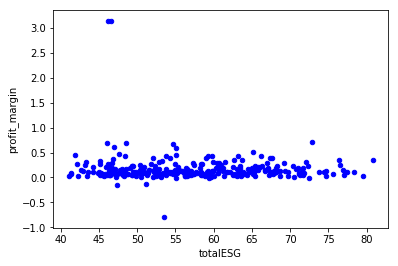

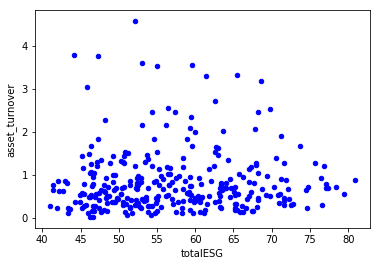

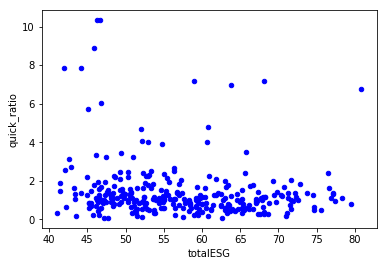

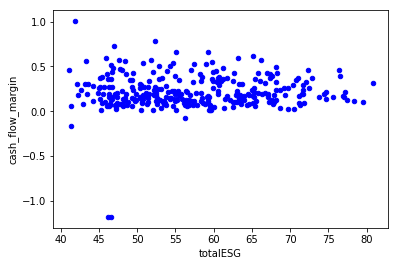

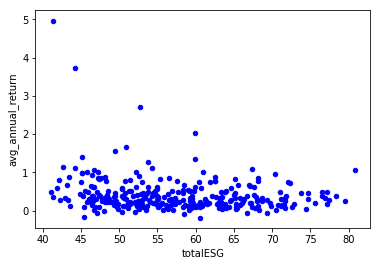

----------------------------------------------------------------------------------------------------

Indepedent Variable: environmentScore



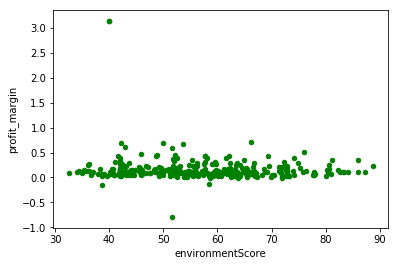

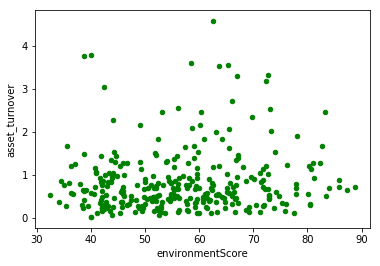

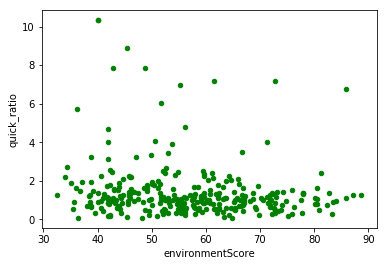

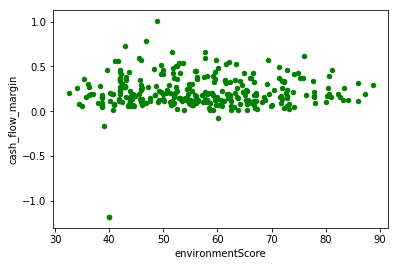

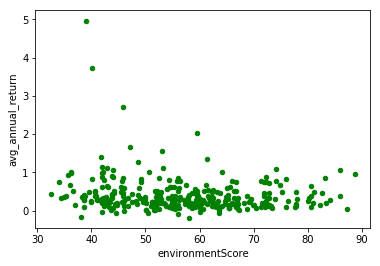

----------------------------------------------------------------------------------------------------

Indepedent Variable: socialScore



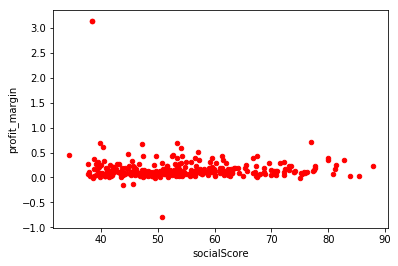

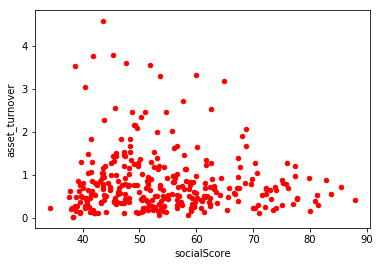

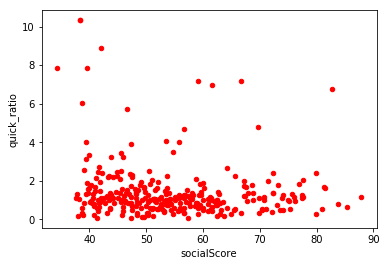

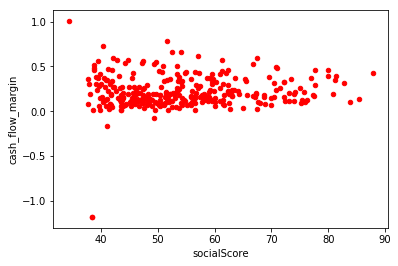

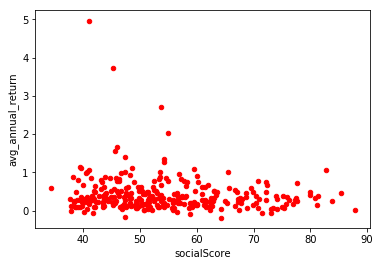

----------------------------------------------------------------------------------------------------

Indepedent Variable: governanceScore



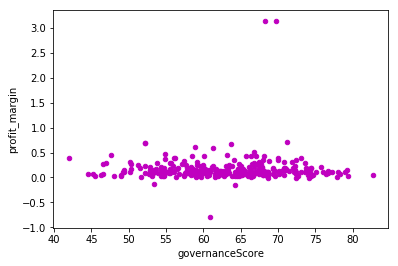

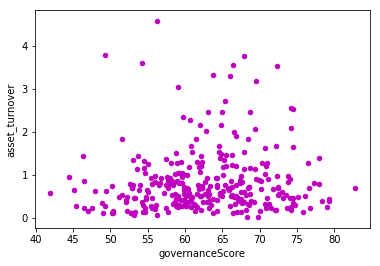

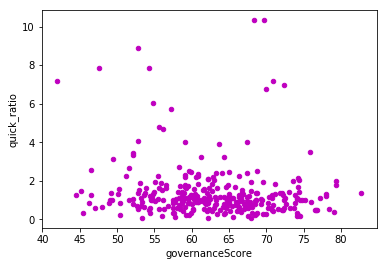

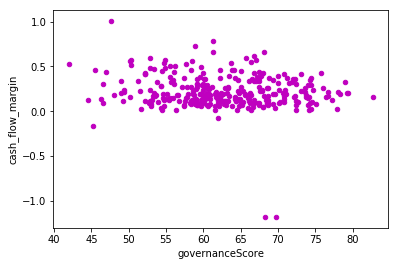

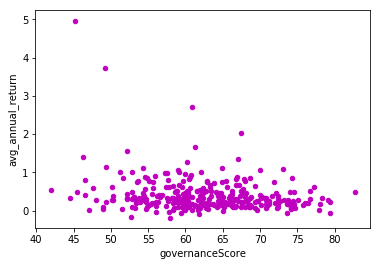

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------

Given that financial metrics will vary based on the nature of the sector, we conducted further analysis separately for each sector to develop a better understanding of the relationship between the sustainable and ethical nature and financial performance.


We aim to analyze correlations between ESG variables and financial metrics for the following sectors:

 ['Basic Materials', 'Communication Services', 'Consumer Cyclical', 'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare', 'Industrials', 'Real Estate', 'Technology', 'Utilities']

Variables: ['totalESG', 'environmentScore', 'socialScore', 'governanceScore']

Metrics:

['profit_margin', 'asset_turnover', 'quick_ratio', 'cash_flow_margin', 'avg_annual_return']


------------------------------------------------------------

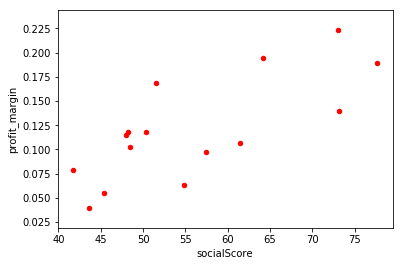

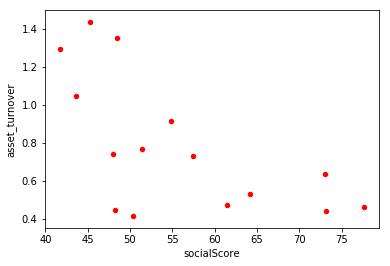

----------------------------------------------------------------------------------------------------

Sector: Communication Services


                metric         indep_var  correlation
141     asset_turnover          totalESG        66.2%
146     asset_turnover  environmentScore        69.4%
151     asset_turnover       socialScore        66.7%
156     asset_turnover   governanceScore        12.2%
144  avg_annual_return          totalESG       -38.4%
149  avg_annual_return  environmentScore       -42.9%
154  avg_annual_return       socialScore       -11.5%
159  avg_annual_return   governanceScore       -50.2%
143   cash_flow_margin          totalESG        34.5%
148   cash_flow_margin  environmentScore        41.5%
153   cash_flow_margin       socialScore        54.2%
158   cash_flow_margin   governanceScore       -44.4%
140      profit_margin          totalESG       -41.7%
145      profit_margin  environmentScore       -48.6%
150      profit_margin       socialScore       -57.6%
1

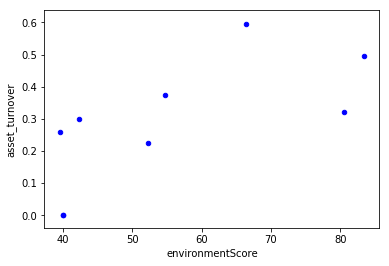

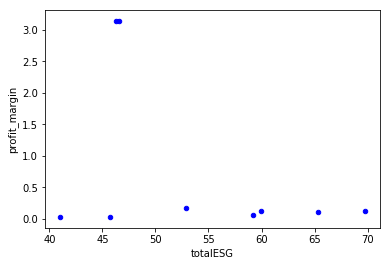

----------------------------------------------------------------------------------------------------

Sector: Consumer Cyclical


                metric         indep_var  correlation
181     asset_turnover          totalESG        10.5%
186     asset_turnover  environmentScore        20.7%
191     asset_turnover       socialScore        -3.2%
196     asset_turnover   governanceScore         6.4%
184  avg_annual_return          totalESG       -28.1%
189  avg_annual_return  environmentScore       -21.1%
194  avg_annual_return       socialScore       -20.7%
199  avg_annual_return   governanceScore       -39.3%
183   cash_flow_margin          totalESG        21.8%
188   cash_flow_margin  environmentScore        14.1%
193   cash_flow_margin       socialScore        23.9%
198   cash_flow_margin   governanceScore        19.4%
180      profit_margin          totalESG        13.0%
185      profit_margin  environmentScore         7.3%
190      profit_margin       socialScore        12.8%
195   

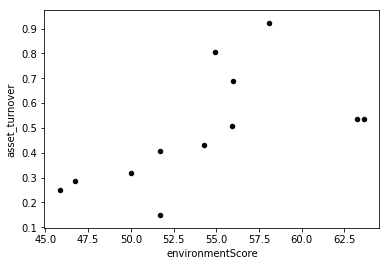

----------------------------------------------------------------------------------------------------

Sector: Financial Services


                metric         indep_var  correlation
121     asset_turnover          totalESG         3.8%
126     asset_turnover  environmentScore       -11.2%
131     asset_turnover       socialScore         8.5%
136     asset_turnover   governanceScore        21.3%
124  avg_annual_return          totalESG        23.9%
129  avg_annual_return  environmentScore        41.2%
134  avg_annual_return       socialScore        20.2%
139  avg_annual_return   governanceScore        -1.2%
123   cash_flow_margin          totalESG        34.2%
128   cash_flow_margin  environmentScore        45.1%
133   cash_flow_margin       socialScore         3.7%
138   cash_flow_margin   governanceScore        35.6%
120      profit_margin          totalESG        61.8%
125      profit_margin  environmentScore        47.5%
130      profit_margin       socialScore        48.4%
135  

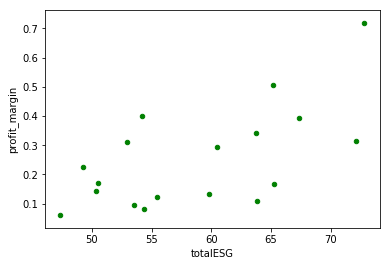

----------------------------------------------------------------------------------------------------

Sector: Healthcare


               metric         indep_var  correlation
1      asset_turnover          totalESG        23.6%
6      asset_turnover  environmentScore        29.1%
11     asset_turnover       socialScore        -1.9%
16     asset_turnover   governanceScore        44.2%
4   avg_annual_return          totalESG        16.2%
9   avg_annual_return  environmentScore         5.5%
14  avg_annual_return       socialScore        32.5%
19  avg_annual_return   governanceScore       -15.9%
3    cash_flow_margin          totalESG       -39.1%
8    cash_flow_margin  environmentScore       -36.8%
13   cash_flow_margin       socialScore       -19.6%
18   cash_flow_margin   governanceScore       -44.0%
0       profit_margin          totalESG       -25.6%
5       profit_margin  environmentScore       -34.2%
10      profit_margin       socialScore        -8.9%
15      profit_margin   gover

In [5]:
# Importing formatting the data frame
df_correlation = pd.read_pickle(f'{file_path}/df_correlation.pkl')
pd.set_option('display.float_format', '{:.1%}'.format)

# Identifying sectors, metrics, and indepedent variables
sectors = np.sort(df_correlation.sector.unique())
list_of_metrics = list(master_df.columns[-5:])
list_of_vars_1 = ['totalESG','environmentScore','socialScore','governanceScore']

# Scatter plots for all companies in the dataset
print('\nScatter plots for all companies in the dataset (ESG Variable vs. Financial Metric)\n\n'+'-'*100)

cnt = 0
for x in list_of_vars_1:
    print(f'\nIndepedent Variable: {x}\n')
    for y in list_of_metrics:
        if cnt < 5:
            master_df.plot.scatter(x,y,c="blue")
            plt.show()
        elif cnt <10:
            master_df.plot.scatter(x,y,c="green")
            plt.show()
        elif cnt <15:
            master_df.plot.scatter(x,y,c="red")
            plt.show()
        else:
            master_df.plot.scatter(x,y,c="m")
            plt.show()
            
        cnt +=1
        
    print('-'*100)

# Sector correlation analysis 
correlation_analysis = {

    'Basic Materials': 'Within the Basic materials industry, there was a strong negative correlation between totalESG score and asset turnover. This was mostly driven by the negative correlation between turnover and the social score. In terms of average annual return, there was a small negative correlation. With cash-flow margin, there was a semi-strong positive correlation with ESG score which was driven by social score. In terms of profit margin, there was a strong positive correlation with social score and this drove the semi strong correlation with overall ESG. The strong social score is most likely because of these companies treating its workers well. Quick ratio had no correlation.',
    'Communication Services': 'In the communications services industry, asset turnover was positively correlated with total ESG score. This correlation was driven by the environmental and social scores. This correlation is largely because of these communication service companies getting rid of their faulty or outdated equipment consistently and using technology that has a smaller carbon footprint. Annual return had a weak negative correlation with its ESG score. Cash flow margin had a weak positive correlation. Profit margin had a semi-strong negative correlation with ESG score. This might be because firms spend more money to buy equipment that would increase their ESG scores or to seem more environment and socially friendly. Lastly, quick ratio had a semi-strong negative correlation with ESG scores.',
    'Consumer Cyclical': 'In the consumer cyclical industry, there was a weak correlation between asset turnover and ESG scores. Average annual return also had a weak correlation to its ESG score. Cash Flow and Profit margin were not correlated to their respective ESG scores. Quick Ratio lastly, had a very weak correlation. Overall, it did not seem like ESG score and the Consumer Cyclical industry were correlated in any direction.',
    'Consumer Defensive': 'The Consumer Defensive industry generally was negatively correlated to its ESG score. Asset turnover had close to zero correlation. However, average annual return had a semi-strong negative correlation. Cash flow margin also had a close to zero correlation. Profit margin had a very weak positive correlation and quick ratio had a semi-strong negative correlation',
    'Energy': 'The energy sector had a semi-strong positive correlation between asset turnover and ESG score. This may be because energy companies have been switching toward more environmentally friendly initiatives and equipment. Average annual return had a semi-strong negative correlation, this was mostly driven by the strong negative correlation with environment score. Cash flow margin had a semi strong  negative correlation while profit margin and quick ratio had almost zero correlation.',
    'Financial Services': 'There was not much correlation for the Financial services sector. In terms of asset turnover, there was little correlation with ESG.  Avg total return had a weak positive correlation. Cash flow margin also had a weak positive correlation. Profit margin was the most surprising since there was a strong positive correlation with the ESG scores. This may be because of the government regulations that have been enacted and the different procedures and accountability measures that have been enacted recently.',
    'Healthcare': 'For the healthcare sector, the only metric that had some correlation significance was the quick ratio. The correlation between ESG and quick ratio was negative semi-strong. This might be the case since healthcare companies reinvest their cash and assets into better equipment and R and D rather than being more ESG conscious.',
    'Industrials': 'There was little or no significance for any of the metrics.',
    'Real Estate': 'There was little or no significance for any of the metrics.',
    'Technology': 'There was little or no significance for any of the metrics.',
    'Utilities': 'Within utilities, There was a weak negative correlation between Average annual return and ESG. This was mostly driven by the semi strong negative correlation with the environment score.'

}    

# Display analysis by sector
print('-'*100+'\n\nGiven that financial metrics will vary based on the nature of the sector, we conducted further analysis separately for each sector to develop a better understanding of the relationship between the sustainable and ethical nature and financial performance.\n\n')
print(f'We aim to analyze correlations between ESG variables and financial metrics for the following sectors:\n\n {list(sectors)}\n\nVariables: {list_of_vars_1}\n\nMetrics:\n\n{list(list_of_metrics)}\n\n')

for i in sectors:
    print('-'*100)
    print(f'\nSector: {i}\n\n')
    print(df_correlation[df_correlation['sector'] == i][['metric','indep_var','correlation']])
    print(f'\n\n{correlation_analysis[i]}\n')
    
# Display scatter plots for selected relationships
    if i == 'Basic Materials':
        master_df[master_df['sector'] == i].plot.scatter('socialScore','profit_margin',c="red")
        master_df[master_df['sector'] == i].plot.scatter("socialScore","asset_turnover",c="red")
        plt.show()
    elif i == 'Communication Services':
        master_df[master_df['sector'] == i].plot.scatter("environmentScore","asset_turnover",c="b")
        master_df[master_df['sector'] == i].plot.scatter("totalESG","profit_margin",c="b")
        plt.show()
    elif i == 'Energy':
        master_df[master_df['sector'] == i].plot.scatter("environmentScore","asset_turnover",c="k")
        plt.show()
    elif i == 'Financial Services':
        master_df[master_df['sector'] == i].plot.scatter("totalESG","profit_margin",c="g")
        plt.show()
    

### Mulitple Linear Regression

#### Method

For each of the assumptions below, we aimed to identify if there was a statistically significant relationship between the stated independent variables and each financial metric.  For the regressions, an alpha of 0.05 was used during the backwards elimination when determining whether a variable was statistically significant.

### Formula

Formally, the model for multiple linear regression, given n observations, is 
yi = β0 +  β1xi1 +  β2xi2 + ... βpxip +  εi for i = 1,2, ... n.

#### Assumption 1: ESG scores can be used to predict financial performance

In [6]:
# Import the first regression analysis data frame
df_regression_1 = pd.read_pickle(f'{file_path}/df_regression_1.pkl')

# Comments on the regression output
regression_analysis_1 = {
    
    'Basic Materials': 'We found that there is a strong correlation between the profit margin and ESG scores within the basic materials industry due to the high R squared number and the low p values. Additionally, over sustainable and ethical profile appears to explain a relatively high proportion of the variance in the liquidity and cash flow margin.',
    'Communication Services': 'We found that there is a strong correlation between a number of financial metrics and the ESG scores within communication services due to the high R squared and the low p values.  This may be because companies that have a better social footprint and ESG score will have more consumers willing to use their product.',
    'Consumer Cyclical': 'We found that there are no strong correlated variables within the consumer cyclical industry’s profitability and ESG scores.',
    'Consumer Defensive': 'We found that there are no strong correlated variables within the consumer defensive’s profitability and ESG scores. With products that consumers consistently use, how sustainable/ethical a company is might not be a major factor in making consumers choose a certain brand of product.',
    'Energy': 'While there are no strong correlated variables within the energy’s profitability, we did not notice the way in which a firm is committed to the environment explains a relatively high proportion of the asset efficiency data points. Ultimately, Like utilities, consumers are looking toward the reliability of the product and not its footprint when making a decision.',
    'Financial Services': 'We found that there are no strong correlated variables within the financial services’ profitability. Since this sector is so heavily regulated, most firms within the sector would have similar ESG scores and there wouldn’t be much of a difference in choosing between different firms. However, interestingly, all four variables, as a whole, explain a high proportion of the variance in average annual return — perhaps, this is due to regulation having a large effect on firm performance.',
    'Healthcare': 'We found that there are no strong correlated variables within the healthcare’s profitability and ESG scores.',
    'Industrials': 'We found that there are no strong correlated variables within the industrials’ profitability and ESG scores.',
    'Real Estate': 'We found that there are no strong correlated variables within the real estate’s profitability and ESG scores. We speculate this is because consumers don’t care about the firm’s ESG score, just that the development is sound and abides by all the government regulations.',
    'Technology': 'We found that there are no strong correlated variables within the technology’s profitability and ESG scores. On the other hand, the relationship between asset efficiency and governance has the highest adjusted r^2, relatively.  This could possibly be explained by tech companies often being the ones to take the initiative to better the way in which the firm is structured/controlled — resulting in more efficient operations.',
    'Utilities': 'We found that there are no strong correlated variables within the utilities profitability and ESG scores. This may be because utilities gain business based on the reliability of the service that is provided and not of its social footprint. However, similar to financial services, we did notice the variance in average return could be well explained by overall level and environment score.  Regarding the environment, utilities have a large footprint on the land, so hedging against downsides and lessening their impact might better position the firm.'
    
}

#  Display analysis
print(f'\n\nWe aim to identify if any of ESG variable scores can be utilized to predict financial performance for the following sectors and metrics:\n\nSectors:\n\n{list(sectors)}\n\nMetrics:\n\n{list(list_of_metrics)}\n\nIndependent Variables Considered:\n\n{list_of_vars_1}\n\n')

for i in sectors:
    print('-'*100)
    print(f'\nSector: {i}\n\n')
    print(df_regression_1[df_regression_1['sector'] == i][['metric','sig_indep_vars','p_values','adj_r_squared']])
    print(f'\n\n{regression_analysis_1[i]}\n')



We aim to identify if any of ESG variable scores can be utilized to predict financial performance for the following sectors and metrics:

Sectors:

['Basic Materials', 'Communication Services', 'Consumer Cyclical', 'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare', 'Industrials', 'Real Estate', 'Technology', 'Utilities']

Metrics:

['profit_margin', 'asset_turnover', 'quick_ratio', 'cash_flow_margin', 'avg_annual_return']

Independent Variables Considered:

['totalESG', 'environmentScore', 'socialScore', 'governanceScore']


----------------------------------------------------------------------------------------------------

Sector: Basic Materials


              metric           sig_indep_vars        p_values  adj_r_squared
6     asset_turnover               [totalESG]         [0.015]          33.1%
9  avg_annual_return               [totalESG]         [0.002]          48.0%
8   cash_flow_margin               [totalESG]           [0.0]          84.9%
5      profit_

#### Assumption 2: Relative difference in the sustainable and ethical nature of a firm versus industry peers can be used to predict the relative financial performance

In [7]:
# Import the second regression analysis dataframe
df_regression_2 = pd.read_pickle(f'{file_path}/df_regression_2.pkl')

# Identify indepedent variables considered, for output purposes
list_of_vars_2 = ['environmentScore','socialScore','governanceScore']

# Comments on regression output 
regression_analysis_2 = {
    
    'Basic Materials': 'Relatively speaking, the only relationship with a high adjusted r^2 is between profit margin and the relative difference in commitment to social and governance factors.',
    'Communication Services': 'Cash flow conversion efficiency, profitability, and liquidity appear to well-explained by the relative difference in environment and governance scores.',
    'Consumer Cyclical': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.',
    'Consumer Defensive': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.',
    'Energy': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.',
    'Financial Services': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.',
    'Healthcare': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.',
    'Industrials': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.',
    'Real Estate': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.',
    'Technology': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.',
    'Utilities': 'There are no relationships where a high proportion of the variance in the financial metric can be explained by relative ESG performance.'
}

# Display regression analysis
print(f'\n\nWe aim to identify if the relative ESG variable scores can be utilized to predict the relative financial performance for the following sectors and metrics:\n\nSectors:\n\n{list(sectors)}\n\nMetrics:\n\n{list(list_of_metrics)}\n\nIndependent Variables Considered:\n\nRelative difference in {list_of_vars_2}\n\nNote: calculations for both relative ESG scores and relative financial performance = (Firm / Peer Avg) - 1\n\n')

for i in sectors:
    print('-'*100)
    print(f'\nSector: {i}\n\n')
    print(df_regression_2[df_regression_2['sector'] == i][['metric','sig_indep_vars','p_values','adj_r_squared']])
    print(f'\n\n{regression_analysis_2[i]}\n')



We aim to identify if the relative ESG variable scores can be utilized to predict the relative financial performance for the following sectors and metrics:

Sectors:

['Basic Materials', 'Communication Services', 'Consumer Cyclical', 'Consumer Defensive', 'Energy', 'Financial Services', 'Healthcare', 'Industrials', 'Real Estate', 'Technology', 'Utilities']

Metrics:

['profit_margin', 'asset_turnover', 'quick_ratio', 'cash_flow_margin', 'avg_annual_return']

Independent Variables Considered:

Relative difference in ['environmentScore', 'socialScore', 'governanceScore']

Note: calculations for both relative ESG scores and relative financial performance = (Firm / Peer Avg) - 1


----------------------------------------------------------------------------------------------------

Sector: Basic Materials


              metric    sig_indep_vars      p_values  adj_r_squared
6     asset_turnover          [s_diff]       [0.023]          26.9%
9  avg_annual_return    constant_value          

# Other Analysis

### Location

In [8]:
# Set credentials
plotly.tools.set_credentials_file(username='matthewpine97', api_key='mhWEnWDJOATPwFtIbvDW')

plotly.tools.set_config_file(world_readable=True,
                             sharing='public')

mapbox_access_token = 'pk.eyJ1IjoibWF0dGhld3BpbmU5NyIsImEiOiJjanJ2aGFkdzIwMjNjNGFwZzZ3Nm81YnlkIn0.IAqVjkbRacg9A7h-WbJkNA'


# Use master_df to get information on states, percentile rank, and number of firms in each state
master_df['state'] = master_df['address'].str.split(', ',expand = True)[2]
master_df['state']
state_averages = master_df.groupby(by = 'state').mean()['totalPercentile'].round(2)
state_averages = state_averages.astype(str)
number_firms = master_df['state'].value_counts()
number_firms = number_firms.astype(str)
data = [number_firms,state_averages]
df = pd.DataFrame(data)
df = df.transpose()
df.columns = ['count', 'avg']
df['text_data'] = '# Firms: ' + df['count']

# Color scale
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
    
]

# Input for plotly    
data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = df.index,
    z = df.avg,
    locationmode = 'USA-states',
    text = df['text_data'],
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Percentile Rank")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Average Total ESG Percentile Rank by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

# Remove temporary column from master_df
master_df = master_df.drop(columns = 'state')

# Plot and save
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map')

/Users/matthewpine/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



While it may appear that Kansas is the state with the highest average percentile rank, there is only one firm considered in the calculation.  Furthermore, when analyzing the states with at least ten companies, there are not any significant discrepancies or trends one can easily identify. However, states like California and New York, which both have tight business regulations, both have an average percentile of ~59%, which is towards the top of the list. Perhaps, this indicates that a higher ESG ranking is influenced by the area which a firm mainly operates.

Note: the dataset does contain companies which are headquartered outside the United States.

Please see below for more specific details.

In [9]:
df[['count','avg']].sort_values('avg', ascending = False)

,count,avg
QC,1,80.85
Netherlands,1,75.76
KS,1,73.91
KY,1,66.36
NE,1,64.52
Ireland,8,61.91
MN,11,60.43
CA,34,59.75
VA,11,59.63
NY,24,59.61


# Conclusion

### Results

In [10]:
# Set the threshold for correlation and adjusted r^2
correl_thres = 0.5
adj_r_squared_thres = 0.5

# Determine which pair(s) (sector and metric) meet(s) the threshold in all of the anlyses 
df_correlation['pair'] = df_correlation[df_correlation['correlation'] > correl_thres]['sector'] + ' and ' + df_correlation[df_correlation['correlation'] > correl_thres]['metric']
df_regression_1['pair'] = df_regression_1[df_regression_1['adj_r_squared'] > adj_r_squared_thres]['sector'] + ' and ' + df_regression_1[df_regression_1['adj_r_squared'] > adj_r_squared_thres]['metric']
df_regression_2['pair'] = df_regression_2[df_regression_2['adj_r_squared'] > adj_r_squared_thres]['sector'] + ' and ' + df_regression_2[df_regression_2['adj_r_squared'] > adj_r_squared_thres]['metric']
result_pairs = df_regression_2[df_regression_2['pair'].notnull()]['pair']
result_pairs = result_pairs.where((result_pairs.isin(df_correlation['pair']))&(result_pairs.isin(df_regression_1['pair'])))
df_pair = pd.DataFrame(result_pairs)
df_pair.reset_index(inplace = True)
df_pair.dropna(inplace = True)
df_pair.drop(columns = 'index')
pair_list = list(df_pair['pair'])
print(f'\nBased on thresholds of {correl_thres} and {adj_r_squared_thres} for correlation and adjusted r^2, respectively, the ethical and sustainable nature of a firm has a statistically significant relationship in all three analyses with the following pair(s) of sector and financial metric:\n\n{pair_list}\n')



Based on thresholds of 0.5 and 0.5 for correlation and adjusted r^2, respectively, the ethical and sustainable nature of a firm has a statistically significant relationship in all three analyses with the following pair(s) of sector and financial metric:

['Basic Materials and profit_margin', 'Communication Services and cash_flow_margin']



In [11]:
# Correlation Analysis
df_correlation[df_correlation['pair'].isin(df_pair['pair'])].iloc[:,:-1]

,sector,metric,indep_var,correlation
200,Basic Materials,profit_margin,totalESG,59.2%
205,Basic Materials,profit_margin,environmentScore,50.7%
210,Basic Materials,profit_margin,socialScore,74.1%
153,Communication Services,cash_flow_margin,socialScore,54.2%


In [12]:
# Regression Analysis for Assumption 1
df_regression_1[df_regression_1['pair'].isin(df_pair['pair'])].iloc[:,:-1]

,sector,metric,sig_indep_vars,p_values,adj_r_squared
5,Basic Materials,profit_margin,"[totalESG, socialScore]","[0.042, 0.005]",93.2%
48,Communication Services,cash_flow_margin,"[totalESG, environmentScore, socialScore]","[0.003, 0.004, 0.005]",71.2%


In [13]:
# Regression Analysis for Assumption 2
df_regression_2[df_regression_2['pair'].isin(df_pair['pair'])].iloc[:,:-1]

,sector,metric,sig_indep_vars,p_values,adj_r_squared
5,Basic Materials,profit_margin,"[s_diff, g_diff]","[0.0, 0.021]",69.6%
48,Communication Services,cash_flow_margin,"[e_diff, g_diff]","[0.001, 0.001]",80.9%


In [14]:
# Reset display option to original
pd.set_option('display.float_format', '{:.2f}'.format)

# Reflection

### Challenges Faced and Lessons Learned

The primary challenges faced are based around the analysis of the data. Specifically, we only utilized current ratings and financial metrics from the previous reporting period.  Given there was only one data point per metric per company, it was difficult to identify trends over time and statistically significant relationships. 

Additionally, there were 689 companies which had ESG scores on Yahoo Finance, but only 310 had information for all the desired metrics readily available.  Therefore, our analysis was conducted on less than half of the potential companies — which is not representative of the whole. 

Lastly, the scores for environment, social, and governance are only high-level ratings.  Because of this, we did not have information on the specific data points or sub-factors which were taken into consideration when calculating the scores.  Given the lack of underlying data points, it is difficult to understand what is driving both the score and any statistically significant relationships.

Ultimately, we learned that the scope of any analysis, especially when pulling data from the internet, is limited to the information and resources available.

### Ideas for Future Analysis

Going forward, we feel the analysis would be more accurate if it was conducted over a time series — potentially 10 years, if ESG data is available.  With this, we would be able to see how changes in the ethical and sustainable nature of a firm move with changes in financial performance.  Additionally, we would test whether certain aspects of ESG are an indicator of future results, rather than past performance.

Furthermore, another consideration is to break down the analysis by country and/or state.  Specifically, take a look how location specific regulations affect the way in which a company operates.  Then, see if the regulations related to certain ESG factors have an impact on the financial performance of the firm. 

Additionally, if possible, we would collect data on the underlying factors which determine the ESG scores.  With this, the regression output would provide more insight on what is potentially driving a strong relationship.

Lastly, for the regression, it would be beneficial to analyze the determined functions and plot the residuals for all outputs.